# Preliminary Text Analysis

In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 

In [2]:
print(sns.__version__)

0.12.2


In [3]:
print(np.__version__)

1.26.3


We load the file and display two random records

In [11]:
file="un-general-debates.csv"
df=pd.read_csv(file)

In [7]:
df.sample(2)

,session,year,country,text
2250,65,2010,UKR,"On behalf of \nUkraine, I sincerely congratula..."
6374,45,1990,COM,"﻿\nSir, it is with great pleasure that I conve..."


## Preliminary information about a dataframe

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7507 entries, 0 to 7506
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   session  7507 non-null   int64 
 1   year     7507 non-null   int64 
 2   country  7507 non-null   object
 3   text     7507 non-null   object
dtypes: int64(2), object(2)
memory usage: 234.7+ KB


In [7]:
df.columns

Index(['session', 'year', 'country', 'text'], dtype='object')

In [8]:
df.dtypes

session     int64
year        int64
country    object
text       object
dtype: object

In [9]:
df.describe() # restricted to numerical data

,session,year
count,7507.000000,7507.000000
mean,49.610763,1994.610763
std,12.892155,12.892155
min,25.000000,1970.000000
25%,39.000000,1984.000000
50%,51.000000,1996.000000
75%,61.000000,2006.000000
max,70.000000,2015.000000


## Overview of the data with Pandas
1. Calculate summary statistics
2. Check for missing values
3. Plot distributions of interesting features
4. Compare distributions across categories
5. Visualize developments over time

### Summary statistics

In [10]:
df['length']=df['text'].str.len()

In [11]:
df.describe()

,session,year,length
count,7507.000000,7507.000000,7507.000000
mean,49.610763,1994.610763,17967.281604
std,12.892155,12.892155,7860.038463
min,25.000000,1970.000000,2362.000000
25%,39.000000,1984.000000,12077.000000
50%,51.000000,1996.000000,16424.000000
75%,61.000000,2006.000000,22479.500000
max,70.000000,2015.000000,72041.000000


In [12]:
df['country']

0       MDV
1       FIN
2       NER
3       URY
4       ZWE
       ... 
7502    KAZ
7503    LBR
7504    BDI
7505    HUN
7506    KWT
Name: country, Length: 7507, dtype: object

How to obtain a summary for Strings by specifying include='0'

In [13]:
df['country'].describe(include='0')

count     7507
unique     199
top        IRN
freq        46
Name: country, dtype: object

## Checking for missing data

In [14]:
df.isna().sum()

session    0
year       0
country    0
text       0
length     0
dtype: int64

## Plotting value distribution

box-plot and histogram for numerical variables

<Axes: >

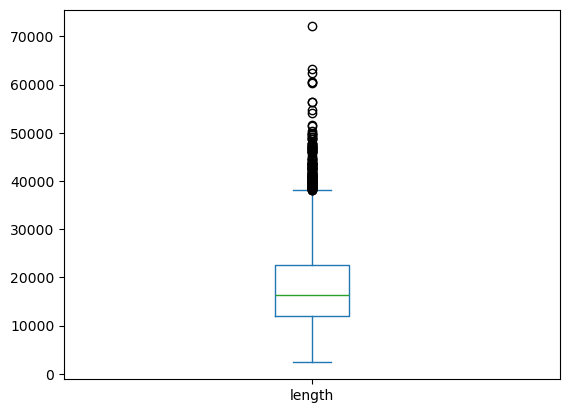

In [15]:
df['length'].plot(kind='box') # option vert=False pour le mettre à l'horizontale

<Axes: title={'center': 'Histogram of variable length'}, ylabel='Frequency'>

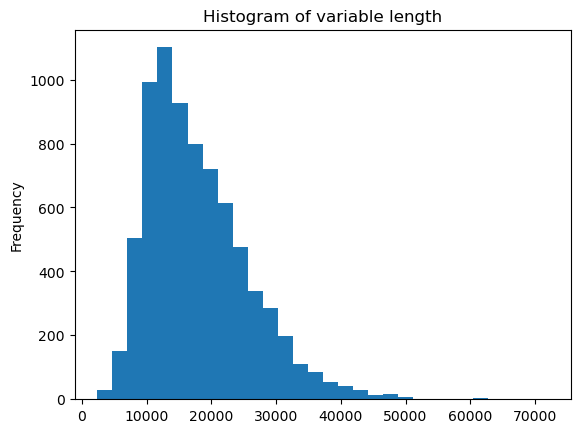

In [16]:
df['length'].plot(kind='hist',bins=30,title='Histogram of variable length') # bins=30 the numerical values are divided into 30 intervals of equal width

## Comparing values across categories

- Comparisons of the distribution of variables across different categories of the data
- Visualisation with boxplot and violin 
- Seaborn's catplot

In [17]:
where = df['country'].isin(['USA','FRA','GBR'])

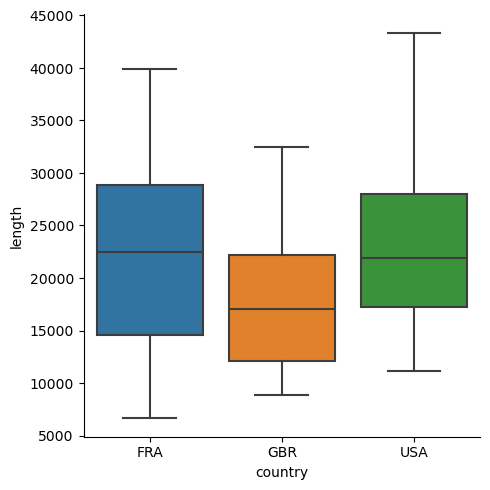

In [18]:
sns.catplot(data=df[where],x="country",y="length",kind="box")

- The violin plot is a "smoothed" version of the boxplot
- The frequencies are represented by the width of the violin body

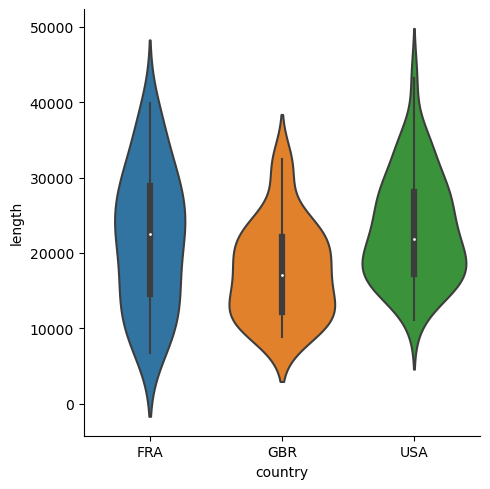

In [19]:
sns.catplot(data=df[where],x="country",y="length",kind="violin")

## Vizualizing Developments over time

- When data have date or time attributes 
- Example: representing the number of countries per year (one speech by country every year)


In [23]:
df.groupby('year').size()

year
1970     70
1971    116
1972    125
1973    120
1974    129
1975    126
1976    134
1977    140
1978    141
1979    144
1980    149
1981    145
1982    147
1983    149
1984    150
1985    137
1986    149
1987    152
1988    154
1989    153
1990    156
1991    162
1992    167
1993    175
1994    178
1995    172
1996    181
1997    176
1998    181
1999    181
2000    178
2001    189
2002    188
2003    189
2004    192
2005    185
2006    193
2007    191
2008    192
2009    193
2010    189
2011    194
2012    195
2013    193
2014    194
2015    193
dtype: int64

<Axes: title={'center': 'Number of countries'}, xlabel='year'>

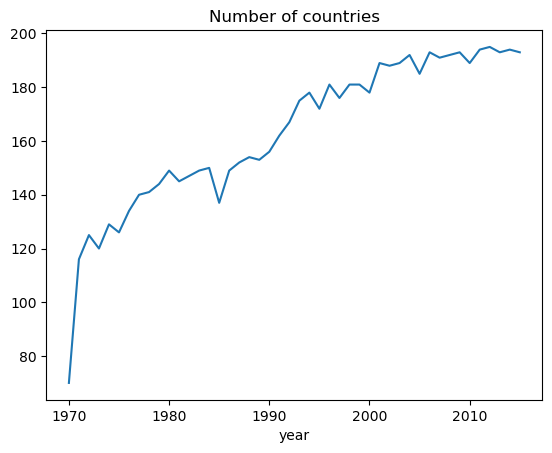

In [20]:
df.groupby('year').size().plot(title="Number of countries")

Computation of the average speech length by year

<Axes: title={'center': 'Avg. Speech Length'}, xlabel='year'>

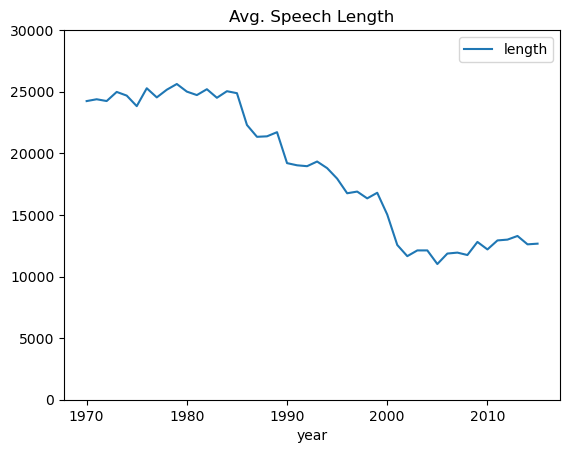

In [24]:
df.groupby('year').agg({"length":"mean"}).plot(title="Avg. Speech Length", ylim=(0,30000))

# Building a Simple Text Processing Pipeline

- Tranformation of the source text 
- Three steps:
    1. Case-folding into lowercase
    2. Tokenization
    3. Stop word removal
- final output: Prepared tokens

## Performing Tokenization

- Tokenization is the process of extracting word from a sequence of characters
- In Western languages, words are separated by space and punctuation most of the time
- We present a simple tokenizer based on regular expressions and show how to use an arbitrary stop word list
- We use Python libraries re and regex

In [12]:
import regex as re

#### Building a function which perform tokenization

In [13]:
def tokenize(text):
    return re.findall(r'[\w-]*\p{L}[\w-]*',text)

In [14]:
test="For the meetings before 1994, the transcripts were produced from the original, raw transcripts in the FOMC Secretariat's files"
tokens=tokenize(test)
print("/".join(tokens))


For/the/meetings/before/the/transcripts/were/produced/from/the/original/raw/transcripts/in/the/FOMC/Secretariat/s/files


## Treating stop words
- The most frequent words are common words: auxiliary verbs, pronouns, adverbs, determiners ( a word that is used before a noun to show which particular example of the noun you are referring to),...
- These words are called **stop words**  
- not very informative about the content of a text, but very frequent
- stop words are therefore frequently removed from the text
- **stop words are removed according to a predefined list** 
- those lists are available for many languages
- we consider an example with NLTK list of stop words


In [15]:
import nltk
#nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\ylepen\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [16]:
# Import stopwords from NLTK

stopwords=set(nltk.corpus.stopwords.words('english'))
print(stopwords)

{'i', 'yourself', 'ourselves', "it's", 'didn', 'shan', 'themselves', 'against', 'down', "haven't", 'no', 'with', "should've", 'am', 'the', "you've", 'are', 'between', 'an', 'into', 'himself', 'your', 'we', 'me', 'theirs', "shouldn't", 'had', 'yours', 'you', 'd', 'where', 'did', 'nor', "you'll", 'does', 'if', 'isn', 'all', 'just', 'they', "you're", 'him', 'and', 'he', 'those', 're', 'she', 'doesn', "didn't", 'don', 'before', 'any', 'at', "aren't", 'up', 'on', 'mightn', 'in', 'such', 'aren', 'about', 'were', 'now', "wasn't", "isn't", "won't", 'through', 'who', 'be', "that'll", 'more', 'herself', 'shouldn', "hasn't", 'there', 'or', 'other', 'under', 'them', 'during', 'mustn', 'has', 'while', 'some', 'm', 'is', 'because', 'further', "mustn't", 'for', 'its', 'having', 'these', 'only', "couldn't", 'hadn', "mightn't", 'wouldn', 'but', 'few', 'o', "weren't", 've', 'a', 'very', 't', 'y', 'once', 'his', 'here', 'both', 'myself', 'itself', 'what', 'this', 'their', 'my', 'whom', 'above', "don't", 

In [36]:
len(stopwords)

179

#### Comments
- not of a lot of stop words in this list
- some inconsistencies: has is not in the list but hasn't belongs to it
- be cautious when using stop words list and check if they are in line with the objectives of the analysis

In [17]:
import spacy 
import en_core_web_sm
en = en_core_web_sm.load()

# Import stopword from spaCy
#import spacy 

# Import stopword from spaCy
#import spacy 
#loading the english language small model of spacy

stopwords_spa = en.Defaults.stop_words

print(len(stopwords_spa))
print(stopwords_spa)

326
{'yourself', 'others', 'latter', 'former', 'might', 'afterwards', 'done', 'someone', 'an', 'into', 'anyone', 'whence', 'whenever', 'onto', 'you', 'nine', 'just', 'ca', 'n‘t', 'almost', 'before', 'any', 'hereafter', 'across', 'meanwhile', 'seeming', 'such', 'hundred', 'top', 'made', 'about', 'were', 'whereupon', 'through', 'upon', '‘ll', 'regarding', 'next', 'or', 'well', 'during', 'them', 'while', 'some', 'is', 'whereby', 'everyone', 'these', 'anywhere', 'thru', 'both', 'already', 'rather', 'what', 'many', 'whom', 'being', 'yourselves', 'latterly', 'as', 'fifty', 'so', 'wherever', 'empty', 'together', 'never', 'bottom', 'always', '’ve', 'used', 'eight', '‘re', 'do', 'elsewhere', 'mine', 'noone', 'ourselves', 'anything', 'thereafter', 'via', 'against', 'down', 'everything', 'no', 'are', 'get', 'whoever', 'we', 'sometime', 'your', 'me', 'did', 'quite', 'all', 'they', 'those', 'however', 'thereby', 'up', 'must', 'go', 'please', 'somewhere', 'back', 'within', "'ve", 'third', 'name', 'b

#### Inclusion of domain-specific stop words

- We can add domain-specific stop word to a predefined list with operator union/or |
- We can exclude some specific stop word from a list with operator difference -

In [18]:
include_stopwords={'dear','regards','must','would','also'}
exclude_stopwords={'against'}

stopwords_spa |= include_stopwords
stopwords_spa -= exclude_stopwords

#### Other options to set a list of stop words
- remove words with a frequency above a given percentage

#### A function to remove stopwords

In [19]:
def remove_stop(tokens):
    return [t for t in tokens if t.lower() not in stopwords]

## Processing a Pipeline with one line of code

- We add a new column called **tokens** to the DataFrame containing the documents.
- This column will contain lowercase, tokenized text, without stop words
- We build a processing pipeline which implement all these tasks

In [20]:
pipeline = [str.lower,tokenize,remove_stop]

In [21]:
def prepare(text,pipeline):
    tokens = text
    for transform in pipeline:
        tokens = transform(tokens)
    return tokens

- Utilization of the functions **apply** and **map**
- Series.map : works element by element on a Pandas Series
- Series.apply : same as map but allows additional parameters
- DataFrame.applymap : element by element on a Pandas DataFrame (same as map on Series)
- DataFrame.apply : works on rows and columns of a DataFrame and supports aggregation

In [22]:
df['tokens']=df['text'].apply(prepare,pipeline=pipeline)

In [23]:
df['tokens'].sample(2)

5800    [peace, security, independence, sovereignty, c...
2692    [mr, president, important, occasion, allow, ex...
Name: tokens, dtype: object

In [57]:
df['num_tokens']=df['tokens'].map(len)
df['num_tokens'].sample(3)

6977     981
119     1967
1691     614
Name: num_tokens, dtype: int64

# Word Frequency Analysis: Bag-of-words approach
- A first analysis of texts based on words or phrases frequently used
- can be useful to uncover the main topics discussed in documents
- limits of word frequency analysis:
    - the order of words is not taken into account
    - the context is ignored
    - **bag-of-words** model: all words are put into a bag
- **bag-of-words** is fit for:
    - classification
    - topic modeling
- **bag-of-words** doesn\'t work well for:
    - sentiment analysis
    - question answering



## Counting words with a counter

In [24]:
from collections import Counter
counter = Counter(df['tokens'][1])
print(counter)

Counter({'united': 24, 'nations': 23, 'international': 15, 'development': 14, 'assembly': 13, 'year': 12, 'states': 11, 'finland': 11, 'countries': 11, 'general': 10, 'global': 10, 'peace-keeping': 10, 'world': 9, 'also': 8, 'organization': 8, 'new': 8, 'developing': 8, 'problems': 8, 'security': 7, 'co-operation': 7, 'environment': 7, 'session': 6, 'role': 6, 'member': 6, 'possible': 6, 'order': 6, 'challenges': 6, 'help': 6, 'must': 6, 'time': 6, 'respect': 6, 'process': 6, 'conference': 6, 'already': 6, 'special': 6, 'strategy': 6, 'national': 6, 'population': 6, 'part': 5, 'present': 5, 'major': 5, 'level': 5, 'finnish': 5, 'requires': 5, 'confidence': 5, 'soon': 5, 'activities': 5, 'protection': 5, 'operations': 5, 'namibia': 5, 'may': 4, 'secretary-general': 4, 'emphasize': 4, 'particularly': 4, 'poverty': 4, 'peace': 4, 'efforts': 4, 'course': 4, 'preparation': 4, 'could': 4, 'take': 4, 'human': 4, 'therefore': 4, 'economic': 4, 'resources': 4, 'increasing': 4, 'would': 4, 'fiel

### Updating a counter

In [59]:
counter.update(df['tokens'][2])
print(counter)

Counter({'international': 49, 'countries': 46, 'united': 40, 'nations': 36, 'development': 31, 'world': 27, 'must': 27, 'peace': 27, 'niger': 25, 'general': 24, 'assembly': 24, 'new': 22, 'economic': 22, 'organization': 21, 'states': 20, 'efforts': 20, 'developing': 19, 'community': 19, 'security': 17, 'political': 17, 'two': 16, 'year': 16, 'conference': 16, 'support': 15, 'people': 14, 'co-operation': 14, 'national': 14, 'session': 12, 'also': 12, 'time': 12, 'africa': 12, 'south': 12, 'secretary-general': 11, 'finland': 11, 'respect': 11, 'process': 11, 'many': 11, 'peoples': 11, 'social': 11, 'problems': 11, 'environment': 11, 'make': 11, 'made': 11, 'african': 11, 'president': 10, 'member': 10, 'possible': 10, 'order': 10, 'global': 10, 'action': 10, 'peace-keeping': 10, 'still': 10, 'state': 9, 'country': 9, 'work': 9, 'special': 9, 'protection': 9, 'parties': 9, 'situation': 9, 'challenges': 8, 'progress': 8, 'last': 8, 'help': 8, 'particularly': 8, 'present': 8, 'us': 8, 'hope'

### Counting the words frequency for a corpus of documents
- option 1: merging all texts into a single one. But too long for large datasets
- option 2: call update function of the counter object for each single document

In [25]:
counter = Counter()
df['tokens'].map(counter.update)
len(counter)

68398

### Finding the most common words in a text

In [61]:
print(counter.most_common(5))

[('nations', 124508), ('united', 120763), ('international', 117223), ('world', 89421), ('countries', 85734)]


### Transforming the counter into a DataFrame

In [26]:
def count_words(df,column='tokens',preprocess=None,min_freq=2):
    # process tokens and update counter
    def update(doc):
        tokens = doc if preprocess is None else preprocess(doc)
        counter.update(tokens)
    
    # create counter and run through all data
    counter = Counter()
    df[column].map(update)
    
    # transform counter into a DataFrame
    freq_df = pd.DataFrame.from_dict(counter,orient='index',columns=['freq'])
    freq_df=freq_df.query('freq>=@min_freq')
    freq_df.index.name='token'
    
    return freq_df.sort_values('freq',ascending=False)
    

In [27]:
freq_df=count_words(df)

In [64]:
freq_df.head(5)

,freq
token,
nations,124508
united,120763
international,117223
world,89421
countries,85734


### Creating a Frequency Diagram

[Text(0.5, 0, 'Frequency'), Text(0, 0.5, 'Token'), Text(0.5, 1.0, 'Top Words')]

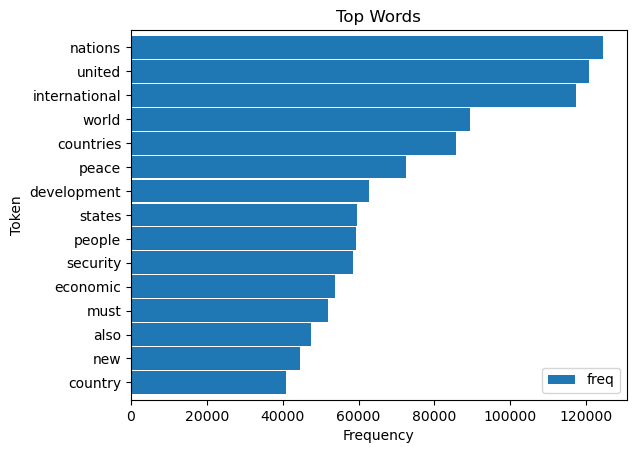

In [65]:
ax=freq_df.head(15).plot(kind='barh',width=0.95)
ax.invert_yaxis()
ax.set(xlabel='Frequency',ylabel='Token',title='Top Words')

### Creating Word Clouds

In [28]:
from wordcloud import WordCloud

#### WordCloud for a single text

In [29]:
text = df.query("year==2015 and country=='USA'")['text'].values[0]

print(text)

Seventy years after the founding of the United Nations it is worth reflecting on what the members of this body, working together, have helped to achieve. Out of the ashes of the Second World War, having witnessed the unthinkable power of the atomic age, the United States has worked with many nations in the Assembly to prevent a third world war — by forging alliances with old adversaries; by supporting the steady emergence of strong democracies accountable to their people and not to any foreign Power; and by building an international system that imposes a cost on those who choose conflict over cooperation, an order that recognizes the dignity and equal worth of all people.
That has been the work of seven decades. That is the ideal that this body has, at its best, pursued. Of course, there have been too many times when, collectively, we have fallen short of those ideals. Over the seven decades, terrible conflicts have claimed untold victims. But we have pressed forward, slowly, steadily,

(-0.5, 399.5, 199.5, -0.5)

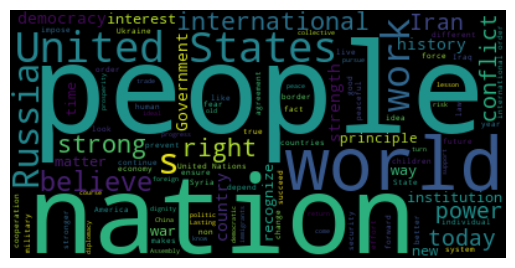

In [30]:
wc = WordCloud(max_words=100,stopwords=stopwords_spa)
wc.generate(text)
plt.imshow(wc,interpolation='bilinear')
plt.axis("off")

#### WordCloud for a corpus of documents

In [31]:
def wordcloud(word_freq, title=None, max_words=200, stopwords=None):
    
    wc = WordCloud(width=800,height=400,
                  background_color='black',colormap='Paired',
                  max_font_size=130,max_words=max_words)
    
    # Convert DataFrame into dict
    if type(word_freq)==pd.Series:
        counter=Counter(word_freq.fillna(0).to_dict())
    else:
        counter=word_freq
        
    #filter stop words in frequency counter
    if stopwords is not None:
        counter={token:freq for (token,freq) in counter.items() if token not in stopwords}
    wc.generate_from_frequencies(counter)
    
    plt.title(title)
    
    plt.imshow(wc,interpolation='bilinear')
    plt.axis('off')

In [32]:
freq_2015_df=count_words(df[df['year']==2015])

In [34]:
freq_2015_df

,freq
token,
nations,2587
united,2571
development,1754
international,1727
world,1635
...,...
nationalism,2
miguel,2
ángel,2


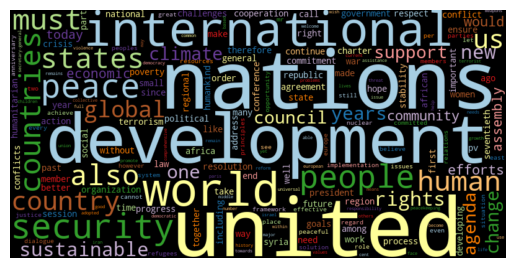

In [33]:
plt.figure()
wordcloud(freq_2015_df['freq'],max_words=200)

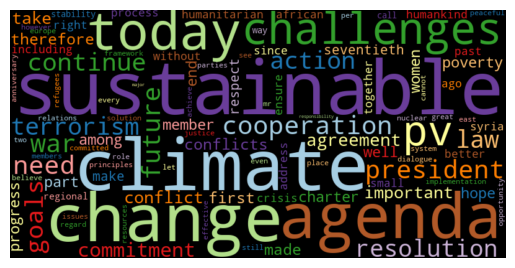

In [35]:
wordcloud(freq_2015_df['freq'],max_words=100,stopwords=freq_df.head(50).index)

In [ ]:
def compute _idf(df,column='tokens',preprocessing=None, min_df=2):




return idf_df